### Show popular word of "eyes makeup" from https://www.allure.com/ ranking

In [1]:
from bs4 import BeautifulSoup
import requests
from fake_useragent import UserAgent
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt

In [7]:
urllst = [] # for url with ranking
user_agent = UserAgent()

def get_url():
    url = 'https://www.allure.com/makeup-looks/eyes'
    response = requests.get(url, headers={ 'user-agent': user_agent.random })
    html_doc = response.text
    soup = BeautifulSoup(response.text, "lxml")
    
    for i in soup.select('div.summary-item__content'):
        to_str=str(i)
        if 'slides' in to_str:
            regext=r'<a class=\"summary[^>]+(mascara|eye).*?>'
            matcht=re.search(regext,to_str)
            if matcht:
                loc=matcht[0].find('href=')
                urllst.append(matcht[0][(loc+6):-2])
    print('Get eyes makeup ranking articles: ' + str(len(urllst)))

def get_article():
    p_str1 = ""
    rmvlst = [' and ',' with ',' to ',' the ',' of ',' it ',' is ',' was ',' this ',' that ',' says ','.','[',']','(',')','{','}','"','/',':','&',',']
        
    for href in urllst:
        wholeurl = 'https://www.allure.com'+ href
        response = requests.get(wholeurl, headers={ 'user-agent': user_agent.random }) 
        html_doc = response.text
        soup = BeautifulSoup(response.text, 'lxml')                
    
        content = soup.select('div.content-chunks > div> div > div> div > div > div > p') # content list
        item= soup.select('div > div > figure > figcaption > div > div > div > div > p') # item list
        if content and item:
            article = content + item
            for i in article:
                tostr = str(i).lower() # turn to lower case str
                regex1 = r"<.*?>" # tag
                match1 = re.sub(regex1,'',tostr) # remove tags
                for k in rmvlst:
                    match1 = " ".join(match1.split()).replace(k,' ') # remove punc. & stop word
                p_str1 += match1 + ' '
            print('Done: '+ wholeurl)
        else:
            print('Not Same Html Structure: '+ url)
        
        save = open("clean_artcle.txt", "w", encoding='utf-8-sig')
        save.write(p_str1)
        save.close()
    print('Get all available artcles')

def to_wordcloud():
    file = open ('clean_artcle.txt', "r", encoding='utf-8').read()
    cloud = WordCloud(width=1600, height=800).generate(file)
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()
    cloud.to_file('output.png')

In [8]:
get_url()

Get eyes makeup ranking articles: 11


In [10]:
get_article()

Done: https://www.allure.com/gallery/best-eyeshadow-palette
Done: https://www.allure.com/gallery/best-waterproof-eyeliner
Done: https://www.allure.com/gallery/best-waterproof-mascara
Done: https://www.allure.com/gallery/how-to-get-the-rainbow-eye-shadow-look
Done: https://www.allure.com/gallery/best-eyebrow-products
Done: https://www.allure.com/gallery/editors-favorite-mascaras
Done: https://www.allure.com/gallery/best-selling-mascaras-amazon
Done: https://www.allure.com/gallery/best-colorful-eyeliners-for-summer
Done: https://www.allure.com/gallery/best-false-eyelashes
Done: https://www.allure.com/gallery/best-drugstore-mascaras
Done: https://www.allure.com/gallery/best-new-mascara
Get all available artcles


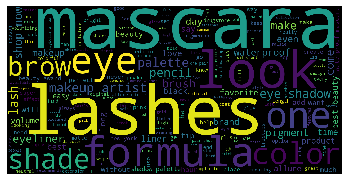

In [11]:
to_wordcloud()